In [2]:
import matplotlib.pyplot as plt
import numpy as np

Today, let's explore some activation functions and weigh pros and cons to each of them. Activation functions are used in neural nets to express non linear functions which allow neural nets to optimize properly for the data that it receives. Firstly let's look at the most simplest function which is the 0-1 step function.

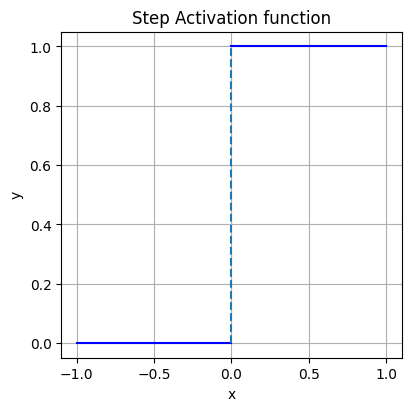

In [19]:
x_values_left = np.linspace(-1.0, 0.0, 5)
x_values_right = np.linspace(0.0, 1.0, 5)

fig, graph = plt.subplots(layout='constrained',figsize=(4,4))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("Step Activation function")

graph.plot(x_values_left, np.zeros_like(x_values_left), color='b')
graph.plot(x_values_right, np.ones_like(x_values_right), color='b')
graph.vlines(0.0, 0.0, 1.0, linestyle='--')

This is the most simplest activation function ever. Negatives are mapped to 0 while positive values are mapped to 1. Obviously, this function isn't useful at all as it can't be controllable and also from the fact that gradients are always 0 everywhere. Let's look at the next classic function. 

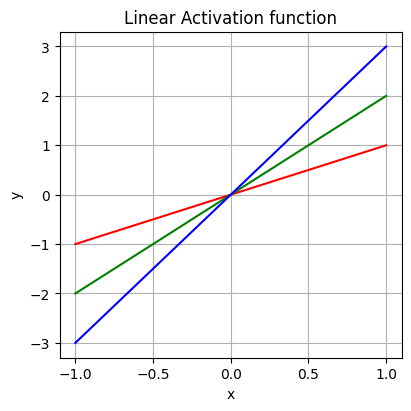

In [21]:
x_values = np.linspace(-1.0, 1.0, 2)

slopes = np.array([1.0,2.0,3.0])
y_values_0 = x_values * slopes[0]
y_values_1 = x_values * slopes[1]
y_values_2 = x_values * slopes[2]

fig, graph = plt.subplots(layout='constrained',figsize=(4,4))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("Linear Activation function")

graph.plot(x_values, y_values_0, color='r')
graph.plot(x_values, y_values_1, color='g')
graph.plot(x_values, y_values_2, color='b')

Here is a linear activation function with different slopes. This is used during linear regression when the data is linear in nature. Of course, the slopes are everything are fully controlled by the neural net. The gradients here are the same everywhere which is good. Of course, when the data expresses a more complicated relationship, we need non linear activation functions. One standard function is the sigmoid. 

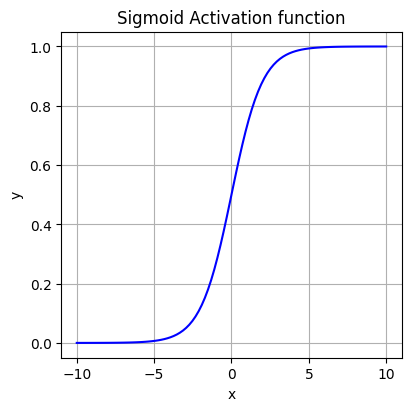

In [26]:
x_values = np.linspace(-10.0, 10.0, 100)
y_values = 1.0/(1+np.exp(-x_values))

fig, graph = plt.subplots(layout='constrained',figsize=(4,4))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("Sigmoid Activation function")

graph.plot(x_values, y_values, color='b')

Here is the sigmoid showing the curviness of the function. This is typically used for logistic regression with binary classification or when you have multi labeling outputs. There are many more details to this function. Firstly, let's look at the gradient of this function. 

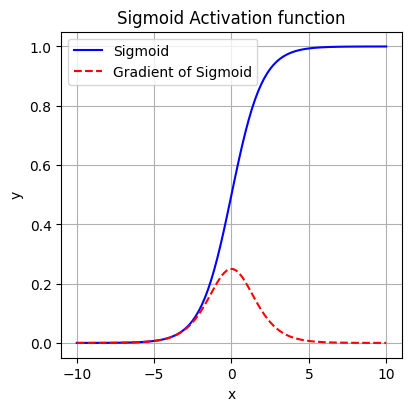

In [51]:
x_values = np.linspace(-10.0, 10.0, 100)
y_values = 1.0/(1+np.exp(-x_values))
y_values_gradient = 1.0/(1+np.exp(-x_values)) * (1-1.0/(1+np.exp(-x_values)))

fig, graph = plt.subplots(layout='constrained',figsize=(4,4))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("Sigmoid Activation function")

graph.plot(x_values, y_values, color='b', label='Sigmoid')
graph.plot(x_values, y_values_gradient, color='r', linestyle='--', label='Gradient of Sigmoid')
plt.legend()

Here we can see the derivative of the sigmoid. Near 0, there is some gradient but as we get to the edges, the gradient effectively disappears. Therefore, for a big neural net using sigmoid activation, you can have vanishing gradient problem where the weights are unlucky and initialized in such a way that gradients effectively drop to 0. Additionally, even when the gradients are non-zero, if your gradients are far away from the origin, it means that learning will often be very slow as the gradients are still near 0. This pattern the sigmoid exhibits is known as a saturating function since when it goes to $-\infty$ or $+\infty$ the gradients disappear. It turns out that saturating functions perform poorly in neural nets due to this phenomenon. Another issue with the sigmoid function is the use of exponential function. Since exponentials are evaluated, the computation will be more slower than using other functions. Anyways, there is another function that helps alleviate some of these issues and that is known as the tanh. 

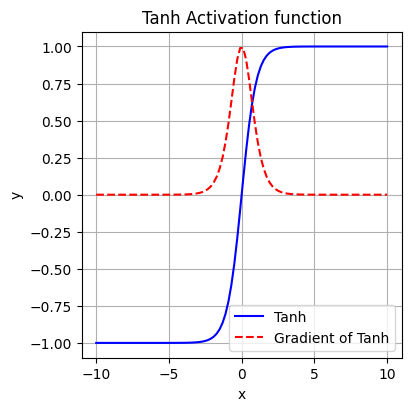

In [62]:
def tanh(x):
    return (np.exp(x_values) - np.exp(-x_values))/(np.exp(x_values) + np.exp(-x_values))

x_values = np.linspace(-10.0, 10.0, 100)
y_values = tanh(x_values)
y_values_gradient = 1 - y_values**2

fig, graph = plt.subplots(layout='constrained',figsize=(4,4))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("Tanh Activation function")

graph.plot(x_values, y_values, color='b', label='Tanh')
graph.plot(x_values, y_values_gradient, color='r', linestyle='--', label='Gradient of Tanh')
plt.legend()

Here the tanh is very similar to the sigmoid. The main difference is that tanh goes from -1.0 to 1.0 where the sigmoid is constrained between 0.0 and 1.0. Anyways, in many cases tanh is better than sigmoid because the gradients are bigger than sigmoid when close to the origin. This makes it a better choice compared to the sigmoid. Unfortunately, even tanh has the vanishing gradient problem since the gradient disappear near both of the edges. The famous function that will fix these issues is the RELU. 

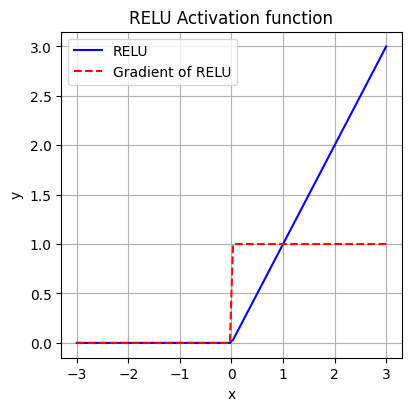

In [47]:
x_values = np.linspace(-3.0, 3.0, 100)
y_values = np.maximum(x_values,np.zeros_like(x_values))
y_values_gradient = (y_values > 0).astype(np.float32)

fig, graph = plt.subplots(layout='constrained',figsize=(4,4))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("RELU Activation function")

graph.plot(x_values, y_values, color='b', label='RELU')
graph.plot(x_values, y_values_gradient, color='r', linestyle='--', label='Gradient of RELU')
plt.legend()

This is the RELU function. It's defined as $f(x)=max(0,x)$ so any negatives become 0. Other than that, it's still effectively a linear function. But don't mistake RELU as a non-linear function. When RELU is chained together in the neural net, it can exhibit quite complex non-linearities. This is because you can effectively control exactly when an activation should be 0 or should be linear. Additionally, the gradient of the relu is 0 on left and 1 on right. One of the sides has no gradient while the other side has gradient of 1. This makes the RELU a non-saturating function. Unlike the sigmoid or tanh, RELU is a much better activation function because it greatly helps with the vanishing gradient problem and makes it very unlikely unless training deep nets. Also, RELU is much faster than sigmoid or tanh both in computation and in training the full model for many situations. These reasons are why the RELU is very common today. With this, even RELU has issues since the left side has gradient of 0. There are certain rare cases where if you don't properly initialize the model weights then the gradients can get stuck and never update. This is known as the dying RELU problem. There are multiple proposals and other functions that can fix this. 

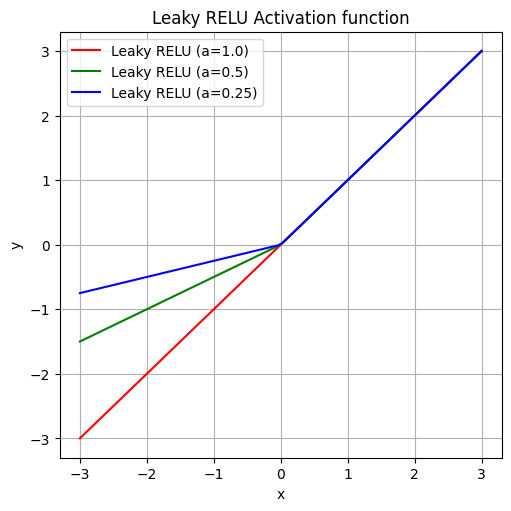

In [60]:
x_values = np.linspace(-3.0, 3.0, 100)

params = [1.0,0.5,0.25]
y_values_0 = np.maximum(x_values,params[0]*x_values)
y_values_1 = np.maximum(x_values,params[1]*x_values)
y_values_2 = np.maximum(x_values,params[2]*x_values)

fig, graph = plt.subplots(layout='constrained',figsize=(5,5))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("Leaky RELU Activation function")

graph.plot(x_values, y_values_0, color='r', label='Leaky RELU (a=1.0)')
graph.plot(x_values, y_values_1, color='g', label='Leaky RELU (a=0.5)')
graph.plot(x_values, y_values_2, color='b', label='Leaky RELU (a=0.25)')

plt.legend()

This is the leaky RELU function. It's defined as $f(x)=max(x,ax)$ where $a$ is a parameter of choice (or can be learned by neural nets). This function solves the problem of dying RELU by making sure that gradients can never be 0 anywhere. It's a very natural extension to the RELU function. In practice, when training neural nets, RELU usually performs very well for many situations. So always trying RELU first is a good approach before going onto Leaky RELU if dying RELU's are common. This is a very uncommon function to use as RELU already performs very well. Additionally, some practitioners have also made the $a$ parameter learnable in neural nets. However, many people suggest this is overkill and unnecessary. Anyways, with that, let's look at some other functions such as the GELU. 

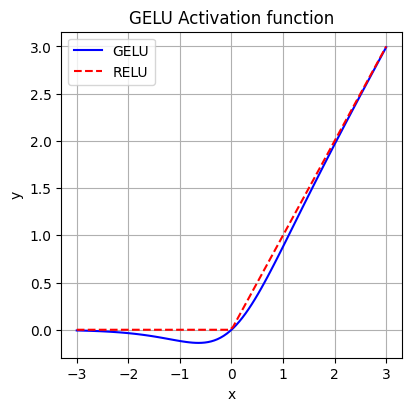

In [67]:
x_values = np.linspace(-3.0, 3.0, 100)
y_values = 0.5*x_values*(1 + tanh(np.sqrt(2/np.pi)*(x_values+0.044715*x_values**3)))
relu_y_values = np.maximum(x_values,np.zeros_like(x_values))

fig, graph = plt.subplots(layout='constrained',figsize=(4,4))
plt.grid(True)

graph.set_xlabel("x")
graph.set_ylabel("y")

graph.set_title("GELU Activation function")

graph.plot(x_values, y_values, color='b', label='GELU')
graph.plot(x_values, relu_y_values, color='r', label='RELU', linestyle='--')
plt.legend()

The GELU is defined as a Gaussian distribution function. It's very similar to a smoother RELU. In practice, the GELU is approximated with a complex looking tanh. The RELU drops to 0 at negatives while the GELU takes on a negative convex curve before eventually dropping of to 0. Of course, this GELU function is rarely used in reality. One advantage the GELU has over the RELU is that it's very difficult for the GELU to have the dying neuron problems. This is because of the typical weight initialization that allows the GELU to avoid the problem. On the other hand, it's hard to evaluate the GELU and is much slower to train the model with this activation function. With this reason, it's rarely used. 